In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical
df5_numeric

{'M', 'F'}
{'KW', 'Jordan', 'Iran', 'Morocco', 'Syria', 'Tunis', 'Egypt', 'Palestine', 'Iraq', 'SaudiArabia', 'USA', 'Lybia', 'lebanon', 'venzuela'}
{'Jordan', 'Iran', 'Syria', 'Morocco', 'Tunis', 'Egypt', 'Palestine', 'Iraq', 'SaudiArabia', 'USA', 'Lybia', 'lebanon', 'KuwaIT', 'venzuela'}
{'MiddleSchool', 'HighSchool', 'lowerlevel'}
{'G-12', 'G-10', 'G-07', 'G-11', 'G-08', 'G-02', 'G-04', 'G-09', 'G-06', 'G-05'}
{'C', 'B', 'A'}
{'Math', 'IT', 'English', 'Spanish', 'Science', 'French', 'Chemistry', 'Geology', 'Arabic', 'Quran', 'History', 'Biology'}
{'S', 'F'}
{'Father', 'Mum'}
{'No', 'Yes'}
{'Good', 'Bad'}
{'Above-7', 'Under-7'}
{'M', 'L', 'H'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0,12,2,6,2,1,1,0,15,16,2,20,1,0,1,0
1,0,0,12,2,6,2,1,1,0,20,20,3,25,1,0,1,0
2,0,0,12,2,6,2,1,1,0,10,7,0,30,0,1,0,1
3,0,0,12,2,6,2,1,1,0,30,25,5,35,0,1,0,1
4,0,0,12,2,6,2,1,1,0,40,50,12,50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,0,0,4,2,6,0,0,5,4,5,8,0,1,0,1
476,1,1,0,0,4,2,7,1,0,50,77,14,28,0,1,1,0
477,1,1,0,0,4,2,7,0,0,55,74,25,29,0,1,1,0
478,1,1,0,0,4,2,10,1,0,30,17,14,57,0,1,0,1


In [5]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0,12,2,6,2,1,1,0,1,0,1,0
1,0,0,12,2,6,2,1,1,0,1,0,1,0
2,0,0,12,2,6,2,1,1,0,0,1,0,1
3,0,0,12,2,6,2,1,1,0,0,1,0,1
4,0,0,12,2,6,2,1,1,0,0,1,0,0


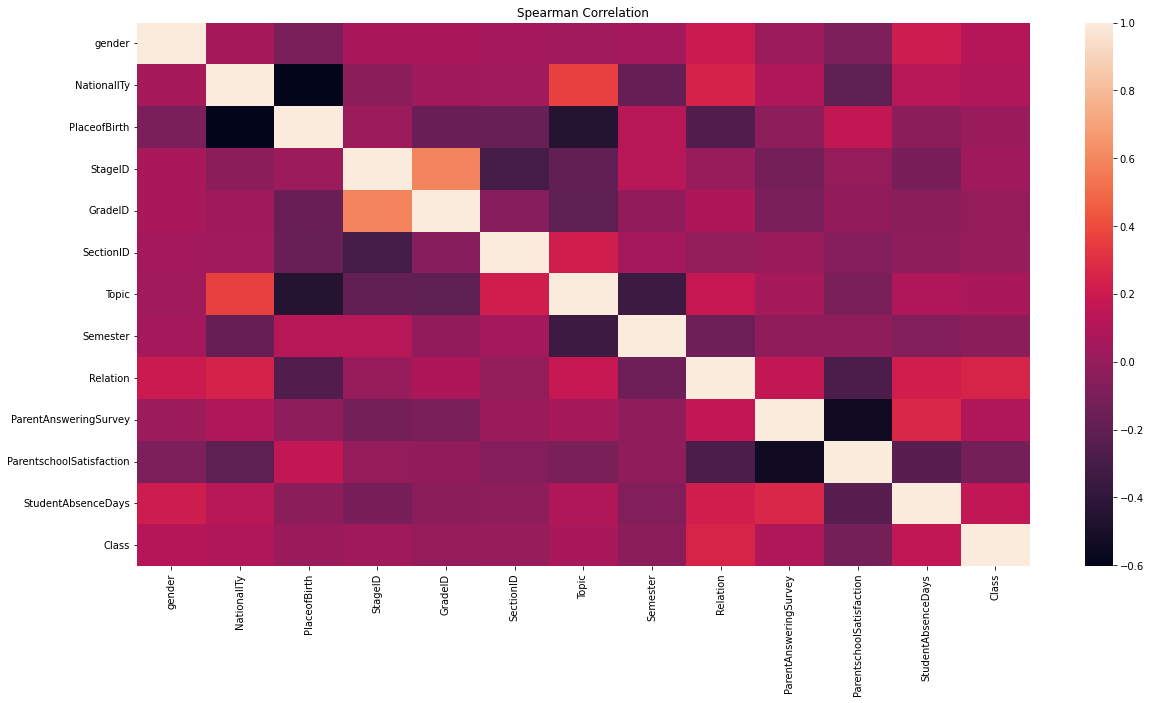

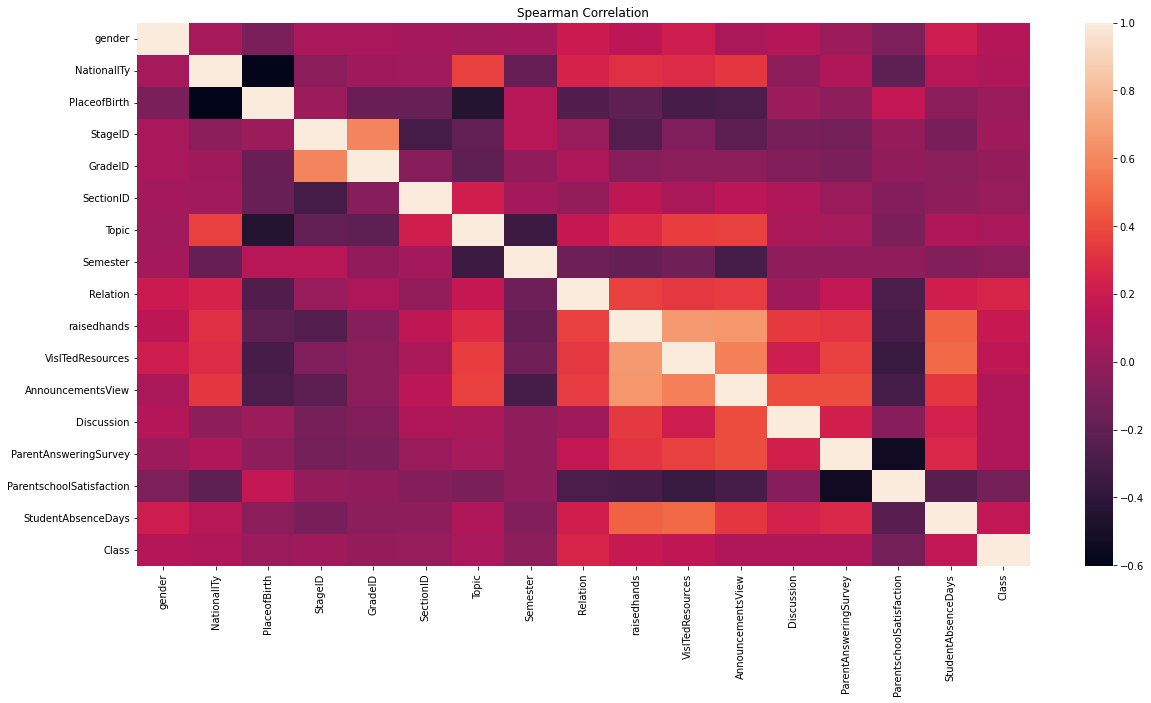

In [6]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr(method="spearman"))
plt.title('Spearman Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr(method="spearman"))
plt.title('Spearman Correlation')
plt.show()


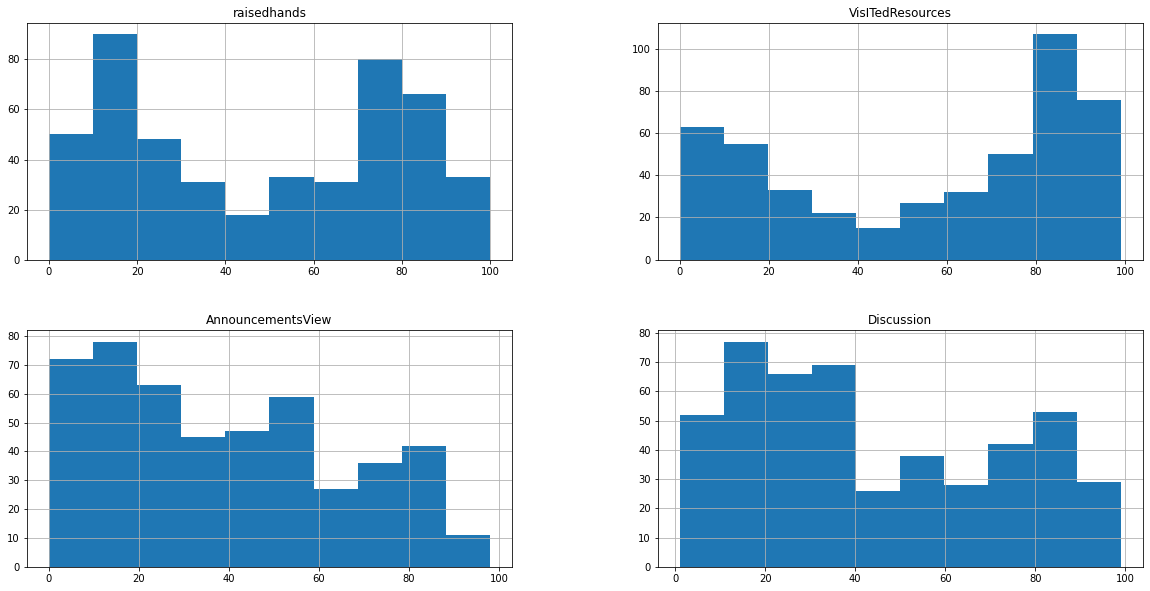

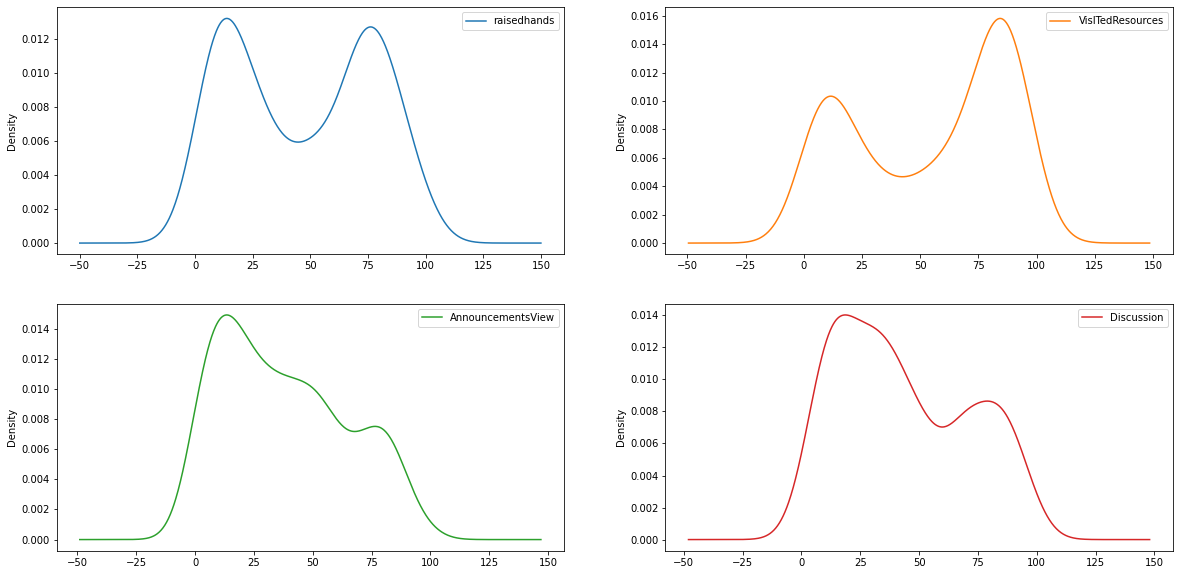

In [7]:
# plot histogram of numeric data
data_numeric.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
data_numeric.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

### Observations:
- The distribution of the data is not normal, so we cannot use parametric tests.

In [8]:
## Perform Hypothesis Testing
from scipy import stats
import numpy as np

## 1. Is there a significant difference in the average grade of students who are absent and those who are present?
## H0: There is no significant difference in the average grade of students who are absent and those who are present.
## H1: There is a significant difference in the average grade of students who are absent and those who are present.

# run t-test
stats.ttest_ind(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

# run ANOVA
stats.f_oneway(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

/home/poorva/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

## Chi-Square test for categorical variables
```https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7```

In [9]:
df = pd.read_csv("xAPI-Edu-Data.csv")

df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])

df_cat = df[cat_var]
cat_var

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [10]:
from itertools import product
import scipy.stats as ss

In [11]:
cat_var1 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var2 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))


In [12]:
result

[('gender', 'NationalITy', 0.014997754560142433),
 ('gender', 'StageID', 0.21984178392095421),
 ('gender', 'GradeID', 0.1494321229221244),
 ('gender', 'Topic', 0.01744724973237198),
 ('gender', 'Semester', 0.32604458862941765),
 ('gender', 'Relation', 2.928549166971103e-05),
 ('gender', 'ParentAnsweringSurvey', 0.6933806327438528),
 ('gender', 'ParentschoolSatisfaction', 0.05107249494015004),
 ('gender', 'StudentAbsenceDays', 7.3829576975348704e-06),
 ('NationalITy', 'gender', 0.014997754560142407),
 ('NationalITy', 'StageID', 8.909144413416853e-10),
 ('NationalITy', 'GradeID', 1.0670911095566858e-28),
 ('NationalITy', 'Topic', 3.303473964491792e-28),
 ('NationalITy', 'Semester', 0.0005782970388494529),
 ('NationalITy', 'Relation', 9.370800462826418e-09),
 ('NationalITy', 'ParentAnsweringSurvey', 0.026121039377948938),
 ('NationalITy', 'ParentschoolSatisfaction', 2.916755790377123e-07),
 ('NationalITy', 'StudentAbsenceDays', 0.0005432640561261366),
 ('StageID', 'gender', 0.219841783920

In [13]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,GradeID,NationalITy,ParentAnsweringSurvey,ParentschoolSatisfaction,Relation,Semester,StageID,StudentAbsenceDays,Topic,gender
var1,,,,,,,,,,
GradeID,NaN,1.067091e-28,6.200180e-02,9.810023e-01,3.593435e-01,4.865202e-08,2.039254e-191,1.436846e-01,9.242719e-185,0.149432
NationalITy,1.067091e-28,NaN,2.612104e-02,2.916756e-07,9.370800e-09,5.782970e-04,8.909144e-10,5.432641e-04,3.303474e-28,0.014998
ParentAnsweringSurvey,6.200180e-02,2.612104e-02,NaN,8.551301e-32,4.733758e-04,6.703754e-01,2.027414e-02,1.827750e-08,7.639185e-02,0.693381
ParentschoolSatisfaction,9.810023e-01,2.916756e-07,8.551301e-32,NaN,5.362664e-10,6.456246e-01,9.203612e-01,9.193766e-07,1.273334e-02,0.051072
Relation,3.593435e-01,9.370800e-09,4.733758e-04,5.362664e-10,NaN,1.549964e-03,6.301552e-01,2.377983e-06,3.715392e-09,0.000029
Semester,4.865202e-08,5.782970e-04,6.703754e-01,6.456246e-01,1.549964e-03,NaN,3.661541e-03,1.351003e-01,3.055073e-23,0.326045
StageID,2.039254e-191,8.909144e-10,2.027414e-02,9.203612e-01,6.301552e-01,3.661541e-03,NaN,3.214826e-02,9.181760e-46,0.219842
StudentAbsenceDays,1.436846e-01,5.432641e-04,1.827750e-08,9.193766e-07,2.377983e-06,1.351003e-01,3.214826e-02,NaN,3.543310e-01,0.000007
Topic,9.242719e-185,3.303474e-28,7.639185e-02,1.273334e-02,3.715392e-09,3.055073e-23,9.181760e-46,3.543310e-01,NaN,0.017447


### Categorical variables correlation

In [14]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features


['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

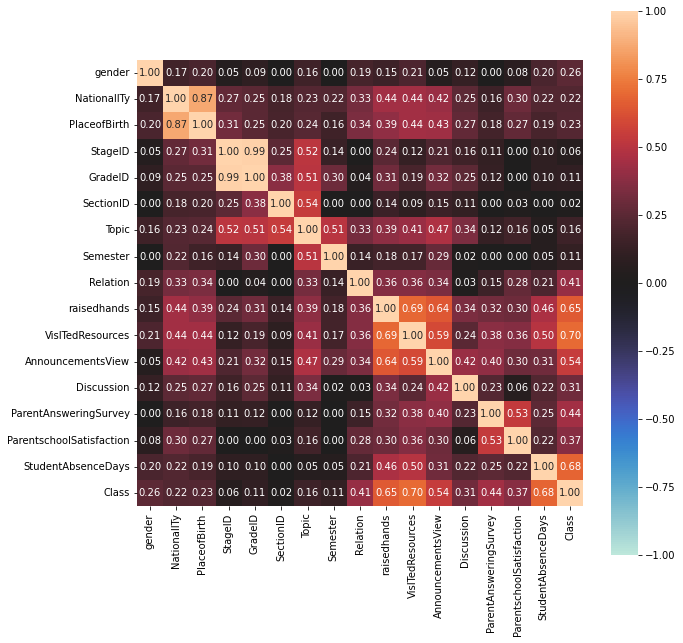

In [15]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

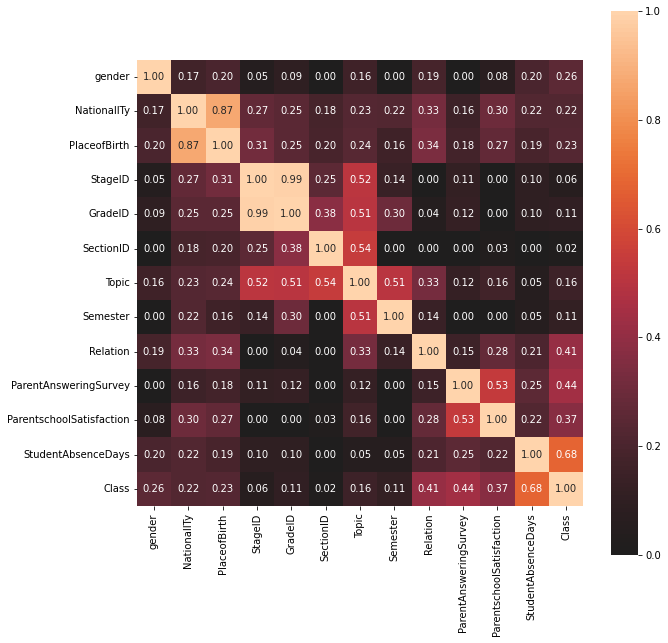

In [16]:
## Categorical variables only

selected_column= df[categorical_features]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

### Basic data analysis

In [17]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


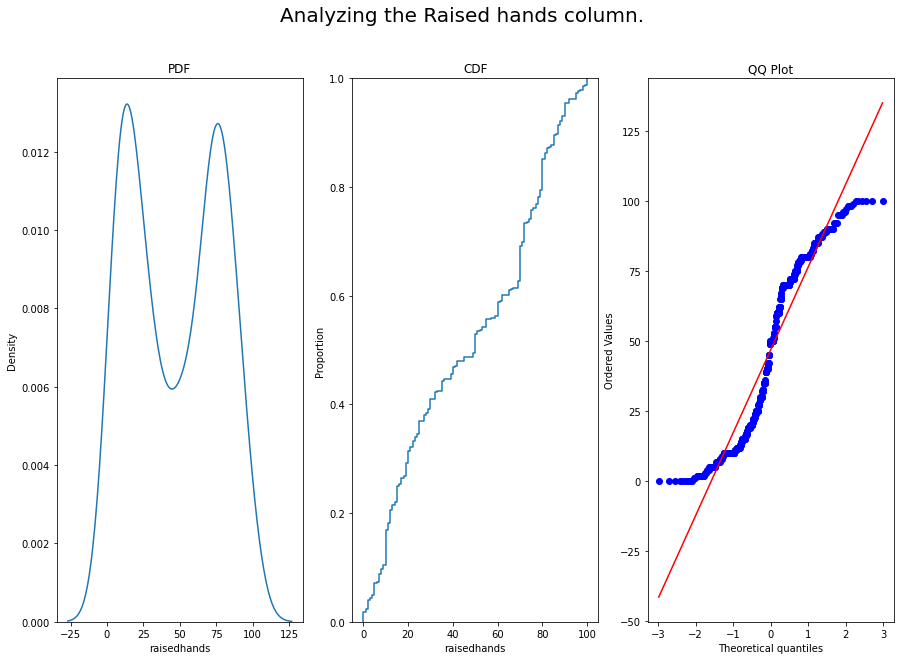

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Analyzing the Raised hands column.', fontsize=20)# Math score PDF
sns.kdeplot(x='raisedhands', data=data, ax=ax1)
ax1.title.set_text('PDF')# Math score CDF
sns.ecdfplot(x='raisedhands', data=data, ax=ax2)
ax2.title.set_text('CDF')# Math score QQ Plot
qq_plot = stats.probplot(x=data['raisedhands'], plot=plt)
ax3.title.set_text('QQ Plot')



### Mann-Whitney U Test
This is for the relation and student gender columns.

In [19]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

le = LabelEncoder()
df = pd.read_csv("xAPI-Edu-Data.csv")

label1 = le.fit_transform(df["gender"])
label2 = le.fit_transform(df["Relation"])

df.drop("gender", axis=1, inplace=True)
df.drop("Relation", axis=1, inplace=True)

df["gender"] = label1
df["Relation"] = label2

data1 = df.query("gender==0")['Relation']
data2 = df.query("gender==1")['Relation']
data1


5      0
8      0
9      0
14     1
15     0
      ..
475    0
476    0
477    0
478    0
479    0
Name: Relation, Length: 175, dtype: int64

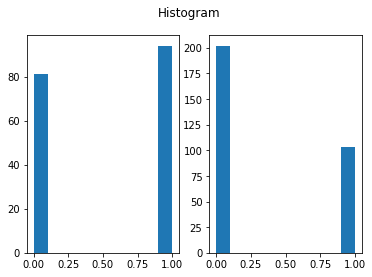

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Histogram")

ax1.hist(data1, histtype='bar')
ax2.hist(data2, histtype='bar')
plt.show()

Performing two-sided Mann-Whitney U test

In [21]:
stats.mannwhitneyu(x=data1, y=data2, alternative='two-sided')

MannwhitneyuResult(statistic=32010.0, pvalue=1.950470758493117e-05)

We see that p<0.05 and U is high thus it is significant and thus the yield between two groups is significantly different.

Performing one-sided Mann-Whitney U test

In [22]:
stats.mannwhitneyu(x=data1, y=data2, alternative='greater')

MannwhitneyuResult(statistic=32010.0, pvalue=9.752353792465585e-06)

We see that p<0.05 and U is high thus it is significant and thus the median for the first group is greater (has more 1s).

### Kruskal Wallis

In [40]:
d1 = df5_numeric.loc[df5_numeric["Class"]==0] #M
d1 = d1.iloc[:,:-1]
d2 = df5_numeric.loc[df5_numeric["Class"]==1] #L
d2 = d2.iloc[:,:-1]
d3 = df5_numeric.loc[df5_numeric["Class"]==2] #H
d3 = d3.iloc[:,:-1]

In [42]:
for (index, column) in enumerate(d1):
    print(column)
    print(stats.kruskal(d1[column], d2[column], d3[column]))


gender
KruskalResult(statistic=33.25680640741851, pvalue=6.003109231422134e-08)
NationalITy
KruskalResult(statistic=27.33920902736032, pvalue=1.157087467962045e-06)
PlaceofBirth
KruskalResult(statistic=16.04957227625828, pvalue=0.00032725000492351685)
StageID
KruskalResult(statistic=6.743736644974491, pvalue=0.03432544639406505)
GradeID
KruskalResult(statistic=0.09174455564028229, pvalue=0.9551639500220923)
SectionID
KruskalResult(statistic=0.5773359665805257, pvalue=0.7492609312589456)
Topic
KruskalResult(statistic=12.233809670139648, pvalue=0.00220527108836756)
Semester
KruskalResult(statistic=7.805353336098968, pvalue=0.020187803015635254)
Relation
KruskalResult(statistic=81.19603022415268, pvalue=2.3361787034778136e-18)
raisedhands
KruskalResult(statistic=207.82418477996066, pvalue=7.439635738339133e-46)
VisITedResources
KruskalResult(statistic=222.1025325016801, pvalue=5.902661234246722e-49)
AnnouncementsView
KruskalResult(statistic=154.84667334456873, pvalue=2.3739529794208974e-3

### Mann-Whitney U test
For low and high performing students

In [45]:
for (index, column) in enumerate(d2):
    print(column)
    print(stats.mannwhitneyu(x=d2[column], y=d3[column], alternative='two-sided'))
    print(stats.mannwhitneyu(x=d2[column], y=d3[column], alternative='greater'))
    print()

gender
MannwhitneyuResult(statistic=5958.5, pvalue=9.080104106224939e-09)
MannwhitneyuResult(statistic=5958.5, pvalue=0.9999999955101186)

NationalITy
MannwhitneyuResult(statistic=5969.5, pvalue=4.909663702946102e-07)
MannwhitneyuResult(statistic=5969.5, pvalue=0.9999997566214747)

PlaceofBirth
MannwhitneyuResult(statistic=11289.0, pvalue=0.00018237974014312342)
MannwhitneyuResult(statistic=11289.0, pvalue=9.118987007156171e-05)

StageID
MannwhitneyuResult(statistic=10146.5, pvalue=0.04725113671823311)
MannwhitneyuResult(statistic=10146.5, pvalue=0.023625568359116556)

GradeID
MannwhitneyuResult(statistic=8875.0, pvalue=0.8188445082100898)
MannwhitneyuResult(statistic=8875.0, pvalue=0.5912066398685285)

SectionID
MannwhitneyuResult(statistic=8632.0, pvalue=0.48744434237370116)
MannwhitneyuResult(statistic=8632.0, pvalue=0.7568435959424062)

Topic
MannwhitneyuResult(statistic=6831.5, pvalue=0.0005462956463873366)
MannwhitneyuResult(statistic=6831.5, pvalue=0.9997284514581203)

Semester
